Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












In [47]:
# Your Work Here

In [48]:
# Import the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import matplotlib.dates as mdates
import calendar

In [49]:
# Import the picture Graph to replicate
from IPython.display import display, Image

url ='https://fivethirtyeight.com/wp-content/uploads/2020/06/paine-JOBS-0619-1.png?w=575'
graph = Image(url=url, width=400)

display(graph)

In [50]:
# Import the spy data from github. I got the csv from yahoo finance
spy = pd.read_csv('https://raw.githubusercontent.com/laguz/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/master/SPY.csv')
print(spy.shape[0])
spy.head()

136


Date        Open        High  ...       Close   Adj Close    Volume
0  2020-01-02  323.540009  324.890015  ...  324.869995  321.555786  59151200
1  2020-01-03  321.160004  323.640015  ...  322.410004  319.120911  77709700
2  2020-01-06  320.489990  323.730011  ...  323.640015  320.338379  55653900
3  2020-01-07  323.019989  323.540009  ...  322.730011  319.437653  40496400
4  2020-01-08  322.940002  325.779999  ...  324.450012  321.140106  68296000

[5 rows x 7 columns]

In [51]:
# Convert the Date column into date obj
spy['Date'] = pd.to_datetime(spy['Date'])
spy['Date']

0     2020-01-02
1     2020-01-03
2     2020-01-06
3     2020-01-07
4     2020-01-08
         ...    
131   2020-07-10
132   2020-07-13
133   2020-07-14
134   2020-07-15
135   2020-07-16
Name: Date, Length: 136, dtype: datetime64[ns]

In [52]:
# Add the month column to the DataFrame
spy['Month'] = spy['Date'].dt.month
# Check data
spy.tail()

Date        Open        High  ...   Adj Close     Volume  Month
131 2020-07-10  314.309998  317.880005  ...  317.589996   57550400      7
132 2020-07-13  320.130005  322.709991  ...  314.839996  102997500      7
133 2020-07-14  313.299988  319.760010  ...  318.920013   93657000      7
134 2020-07-15  322.410004  323.040009  ...  321.850006   87196500      7
135 2020-07-16  319.790009  321.279999  ...  320.790009   54471700      7

[5 rows x 8 columns]

In [53]:
# Convert the month from integer to string
spy['Month'] = spy['Month'].apply(lambda x: calendar.month_abbr[x])
# Check data
spy['Month']

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
131    Jul
132    Jul
133    Jul
134    Jul
135    Jul
Name: Month, Length: 136, dtype: object

In [54]:
# Copy the spy data
spx = spy.copy()

In [55]:
xlabels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul"]

In [56]:
# Convert the spy data to spx data
spx[['Open','High','Low','Close','Adj Close']] = spy[['Open','High','Low','Close','Adj Close']].multiply(100)
# Check the data
spx.head()

Date        Open        High  ...   Adj Close    Volume  Month
0 2020-01-02  32354.0009  32489.0015  ...  32155.5786  59151200    Jan
1 2020-01-03  32116.0004  32364.0015  ...  31912.0911  77709700    Jan
2 2020-01-06  32048.9990  32373.0011  ...  32033.8379  55653900    Jan
3 2020-01-07  32301.9989  32354.0009  ...  31943.7653  40496400    Jan
4 2020-01-08  32294.0002  32577.9999  ...  32114.0106  68296000    Jan

[5 rows x 8 columns]

In [57]:
datemin = spx['Month'][0]
max = spx.shape[0]
datemax = int(max) - 1

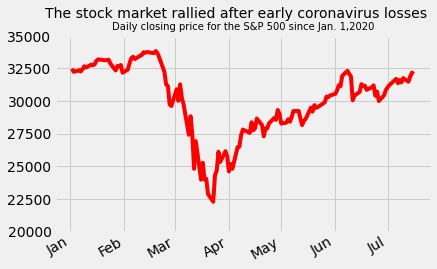

In [58]:
fig, ax = plt.subplots()

plt.plot(spx['Date'],spx['Close'],'red')
plt.style.use('fivethirtyeight')
ax.set_xticklabels(xlabels)
ax.set_ylim(20000,35000)
plt.suptitle('The stock market rallied after early coronavirus losses', fontsize=14)
fig.autofmt_xdate()
plt.title('Daily closing price for the S&P 500 since Jan. 1,2020',fontsize=10);

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [59]:
# More Work Here